# GHCN data
## Averages
Checking averages

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2
import src.ghcn as ghcn

In [4]:
%%time
full_temp_df = pd.read_csv("./../data/ghcn_temps.csv")

CPU times: user 32.6 s, sys: 2.09 s, total: 34.7 s
Wall time: 36.3 s


In [5]:
%%time
full_temp_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37122087 entries, 0 to 37122086
Data columns (total 10 columns):
Unnamed: 0    int64
ID            object
YEAR          int64
MONTH         int64
ELEMENT       object
var           object
temp_c        int64
day           int64
temp_f        float64
date          object
dtypes: float64(1), int64(5), object(4)
memory usage: 10.6 GB
CPU times: user 1min 57s, sys: 8.33 ms, total: 1min 57s
Wall time: 1min 57s


In [6]:
%%time
avg_temp_df = full_temp_df.groupby(["date","ELEMENT"], as_index = False).agg({"temp_f": "mean"})

CPU times: user 4.07 s, sys: 180 ms, total: 4.25 s
Wall time: 4.26 s


In [16]:
len(avg_temp_df)

136614

In [8]:
avg_temp_df.head()

,date,ELEMENT,temp_f
0,1833-01-02,TMAX,29.48
1,1833-01-02,TMIN,23.36
2,1833-01-03,TMAX,26.42
3,1833-01-03,TMIN,19.76
4,1833-01-04,TMAX,24.98


In [7]:
%%time
avg_temp_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136614 entries, 0 to 136613
Data columns (total 3 columns):
date       136614 non-null object
ELEMENT    136614 non-null object
temp_f     136614 non-null float64
dtypes: float64(1), object(2)
memory usage: 18.8 MB
CPU times: user 238 ms, sys: 0 ns, total: 238 ms
Wall time: 237 ms


In [8]:
avg_temp_df[avg_temp_df.date == "1990-01-01"]

,date,ELEMENT,temp_f
114684,1990-01-01,TMAX,47.299196
114685,1990-01-01,TMIN,31.151620


In [9]:
avg_temp_df[avg_temp_df.date == "2010-01-01"]

,date,ELEMENT,temp_f
129294,2010-01-01,TMAX,44.085156
129295,2010-01-01,TMIN,27.173635


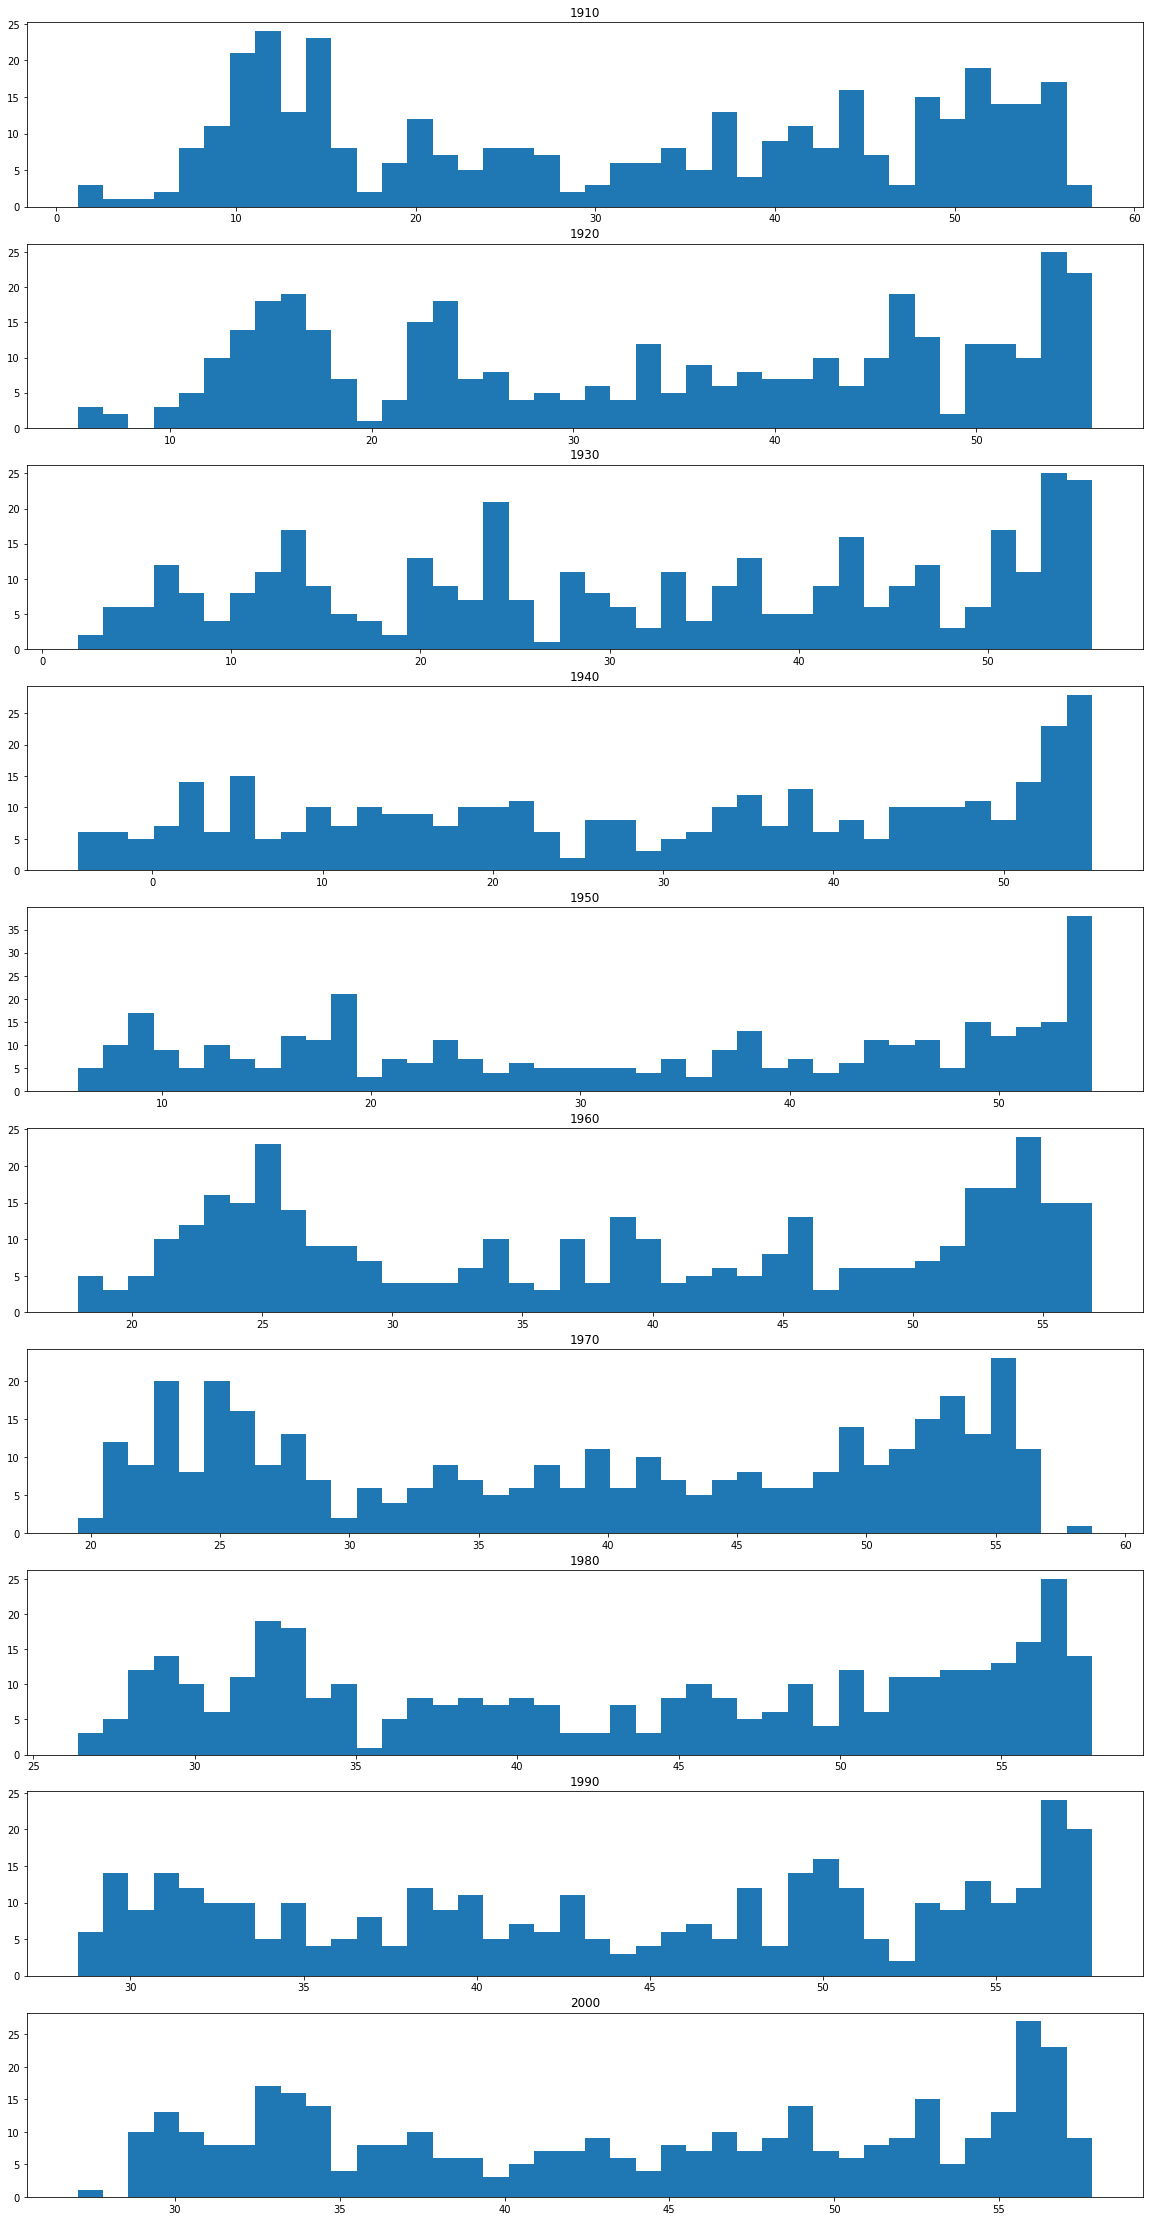

In [12]:
fig, ax = plt.subplots(figsize = (20, 40), nrows = 10)
for i in range(10):
    ax[i].hist(avg_temp_df[(avg_temp_df["date"].str.split("-").map(lambda x: x[0]) == str(1910 + 10 * i)) & (avg_temp_df.ELEMENT == "TMIN")].temp_f, bins = 40)
    ax[i].set_title(str(1910 + 10 * i))

In [32]:
avg_temp_df["month_day"] = avg_temp_df.date.str.split("-").map(lambda x: "-".join(x[1:]))
avg_temp_df["month"] = avg_temp_df.date.str.split("-").map(lambda x: x[1]).astype(int)
avg_temp_df["year"] = avg_temp_df.date.str.split("-").map(lambda x: x[0]).astype(int)

In [33]:
avg_temp_df.head()

,date,ELEMENT,temp_f,month_day,year,month
0,1833-01-02,TMAX,29.48,01-02,1833,1
1,1833-01-02,TMIN,23.36,01-02,1833,1
2,1833-01-03,TMAX,26.42,01-03,1833,1
3,1833-01-03,TMIN,19.76,01-03,1833,1
4,1833-01-04,TMAX,24.98,01-04,1833,1


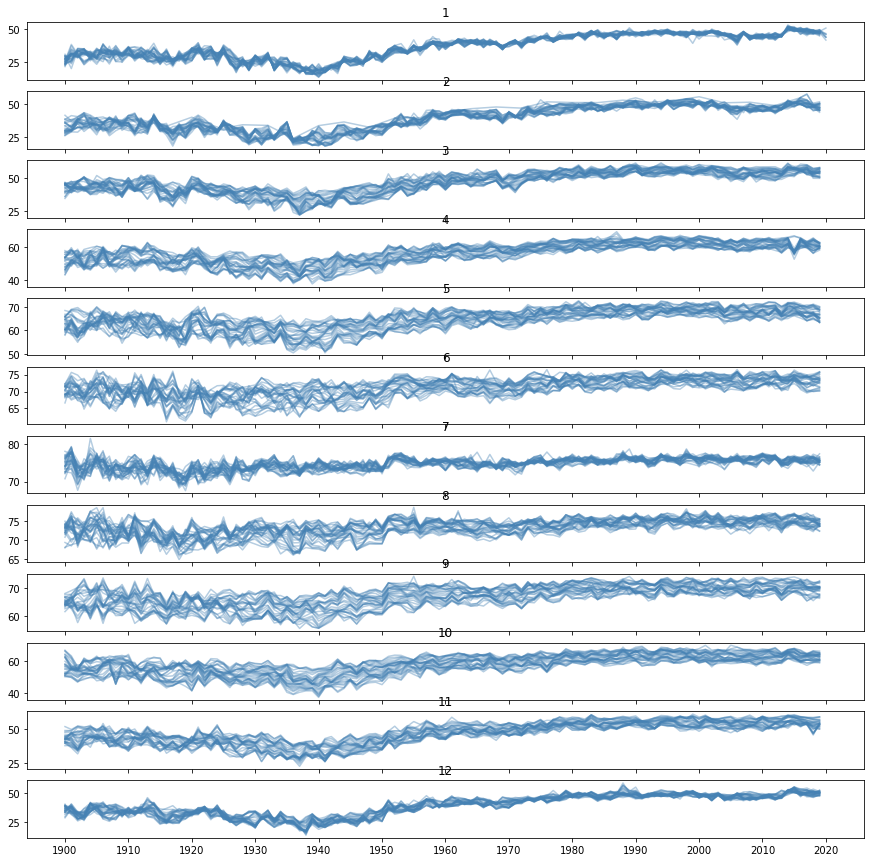

In [38]:
fig, ax = plt.subplots(figsize = (15, 15), nrows = 12, sharex = True)
element = "TMAX"
min_year = 1900
for month in avg_temp_df.month.unique():
    month_avg_temps = avg_temp_df[(avg_temp_df.month == month) & (avg_temp_df.ELEMENT == element) & (avg_temp_df.year >= min_year)]
    for month_day in month_avg_temps.month_day.unique():
        month_day_avg_temps = month_avg_temps[month_avg_temps.month_day == month_day]
        ax[month - 1].plot(month_day_avg_temps.year, month_day_avg_temps.temp_f, color = "steelblue", alpha = 0.4)
    ax[month -1].set_title(month)
ax[0].set_xticks(range(1900, 2021, 10));